In [84]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [94]:
# start = dt.date(2006,1,1)
# end = dt.date(2016,1,1)
start = dt.date(2006,1,1)
end = dt.date(2023,1,1)
ticker_list = ['BAC','C','GS','JPM','MS','WFC']
#data = yf.download(ticker_list,start=start,end=end)

In [95]:
# Bank of America
BAC = yf.download("BAC", start=start,end=end)

# CitiGroup
C = yf.download("C", start=start,end=end)

# Goldman Sachs
GS = yf.download("GS", start=start,end=end)

# JPMorgan Chase
JPM = yf.download("JPM", start=start,end=end)

# Morgan Stanley
MS = yf.download("MS", start=start,end=end)

# Wells Fargo
WFC = yf.download("WFC", start=start,end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [96]:
Bank_Stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=ticker_list)

In [97]:
Bank_Stocks.columns.names = ['Bank Ticker','Stock Info']

In [98]:
Bank_Stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.695641  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.348431  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.390095  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.341480  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.362320  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.995918  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.019238  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.112511  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.147499  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.508980  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.542267  11016400  
2006-01-04   31.530001  19.315599  10870000  
2006-01-05   31.495001  19.294161  10158000  
2006-01-06   31.680000  19.407494   8403800  
2006-01-09   31.674999  19.404432   5619600  

[5 rows x 36 columns]

In [128]:
type(WFC)

pandas.core.frame.DataFrame

In [99]:
#EDA

#What is the max Close price for each bank's stock throughout the time period?
# for tick in ticker_list:
#     print(tick,Bank_Stocks[tick]['Close'].max())
Bank_Stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

In [100]:
#This dataframe will contain the returns for each bank's stock
returns = pd.DataFrame()

In [101]:
for tick in ticker_list:
    returns[tick + ' Return'] = Bank_Stocks[tick]['Close'].pct_change()

In [102]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


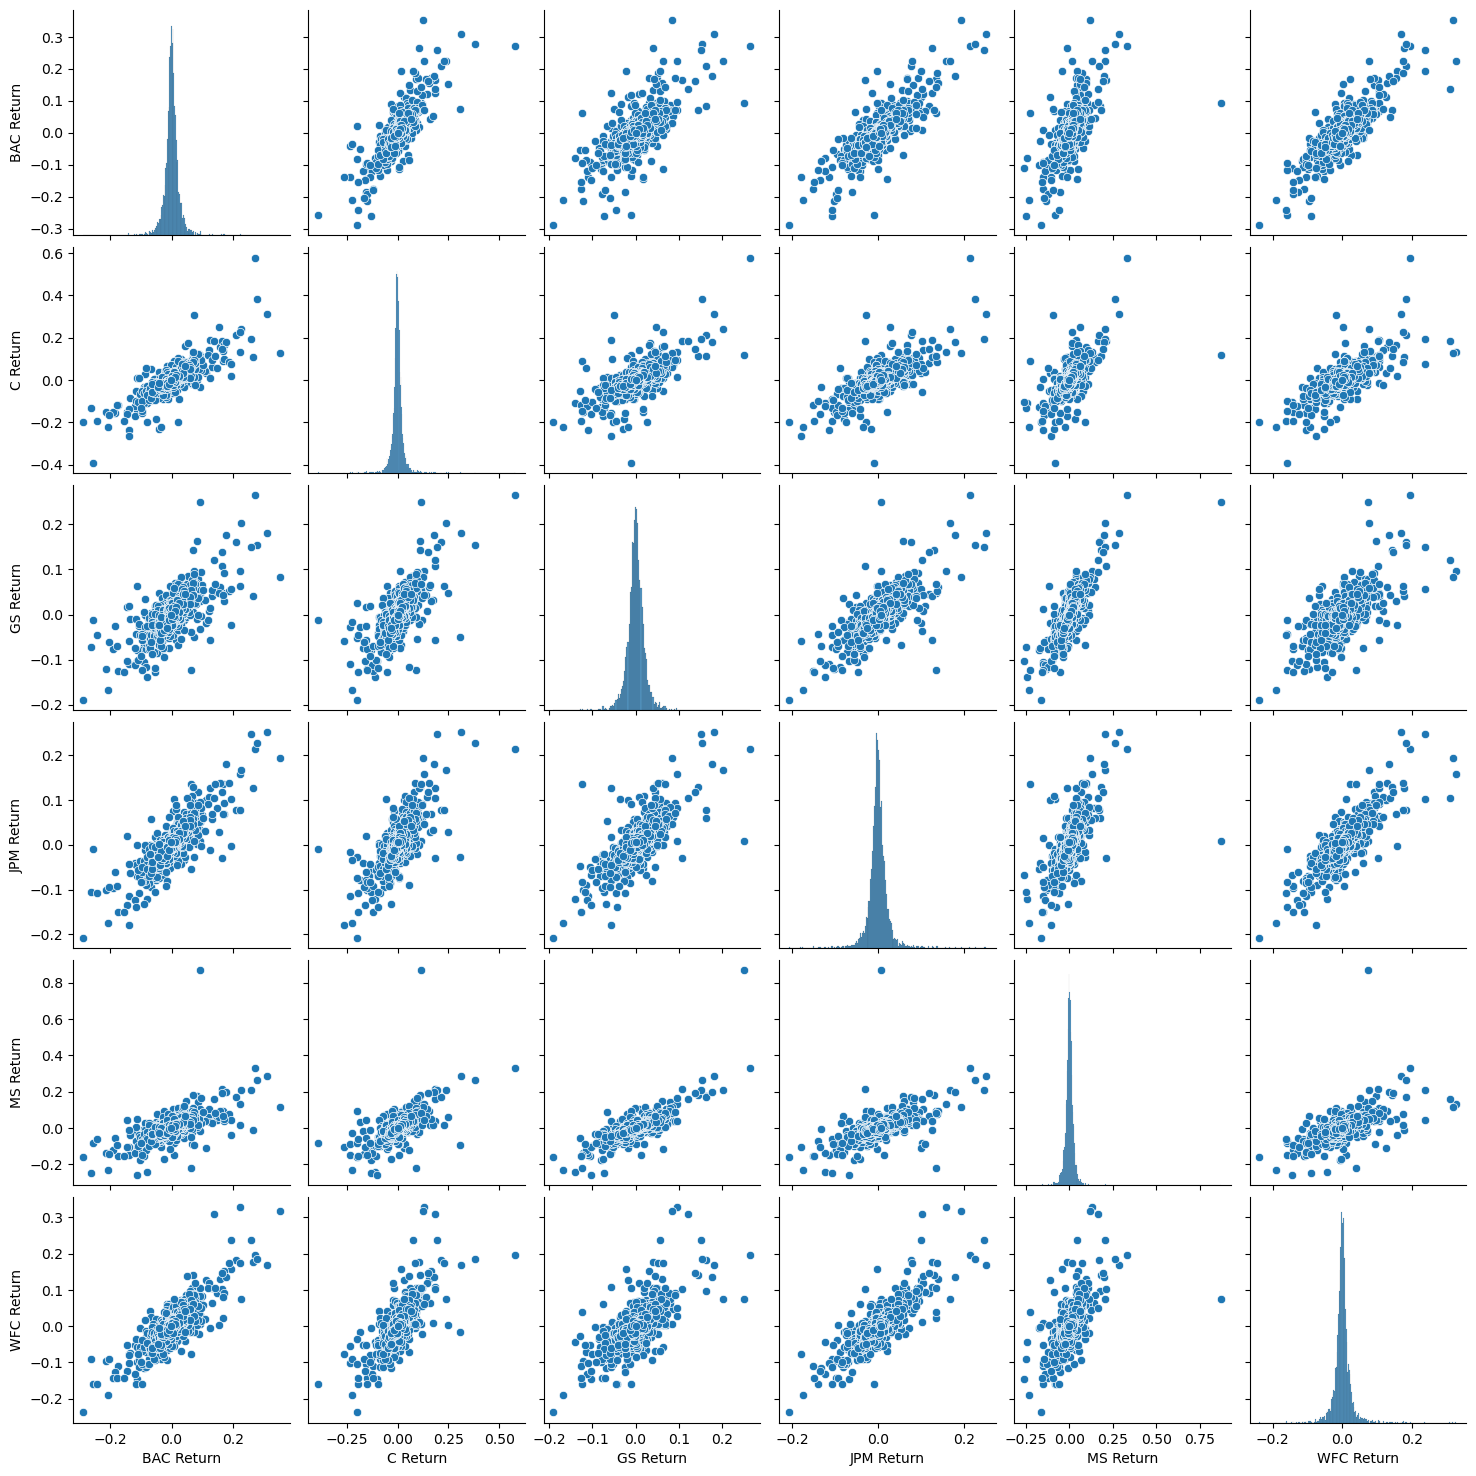

In [103]:
sns.pairplot(returns[1:])

In [146]:
Bank_Stocks.loc['2009-01-20':'2009-01-21']['JPM']

Stock Info,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-20,21.000000,21.27,17.700001,18.090000,12.624361,142090400
2009-01-21,19.290001,22.84,18.879999,22.629999,15.792667,136421400


In [104]:
#Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [106]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [107]:
#Take a look at the standard deviation of the returns, 
#which stock would you classify as the riskiest over the entire time period? 
#Which would you classify as the riskiest for the year 2015


#If a Stock having very high standard deviation on returns that means that stock is riskier
returns.std()

BAC Return    0.031171
C Return      0.032954
GS Return     0.023078
JPM Return    0.024309
MS Return     0.031985
WFC Return    0.026867
dtype: float64

In [129]:
returns.loc['2008-01-01':'2009-12-31'].std()

BAC Return    0.070748
C Return      0.076439
GS Return     0.044563
JPM Return    0.052131
MS Return     0.071731
WFC Return    0.059993
dtype: float64

E:\SOFTWARE\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MS Return', ylabel='Density'>

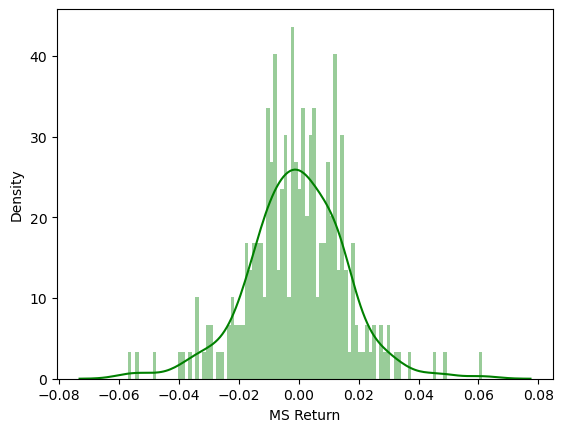

In [133]:
#Create a distplot using seaborn of the 2015 returns for Morgan Stanley
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

In [ ]:
#Create a distplot using seaborn of the 2008 returns for CitiGroup


E:\SOFTWARE\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='C Return', ylabel='Density'>

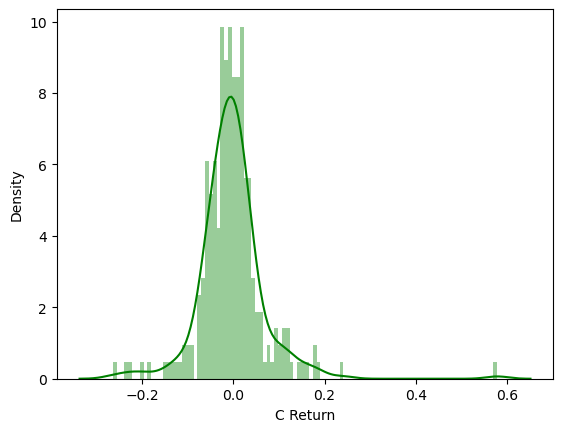

In [110]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='green',bins=100)

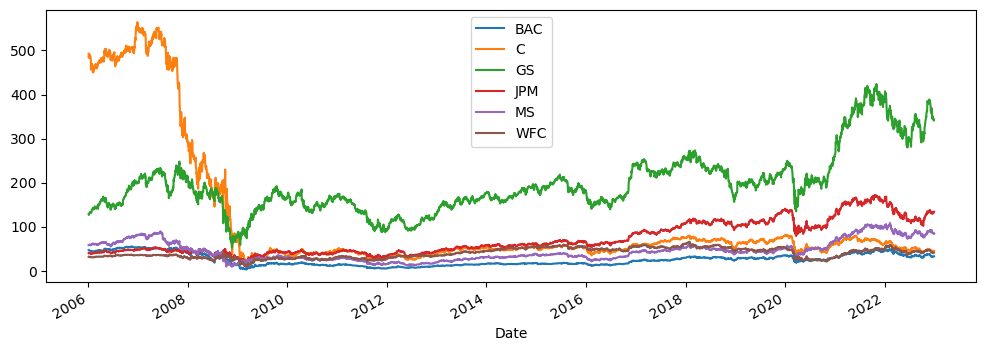

In [111]:
#Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use .xs to get a cross section of the data.)
for tick in ticker_list:
    Bank_Stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [112]:
#Using Iplot Plotly
Bank_Stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

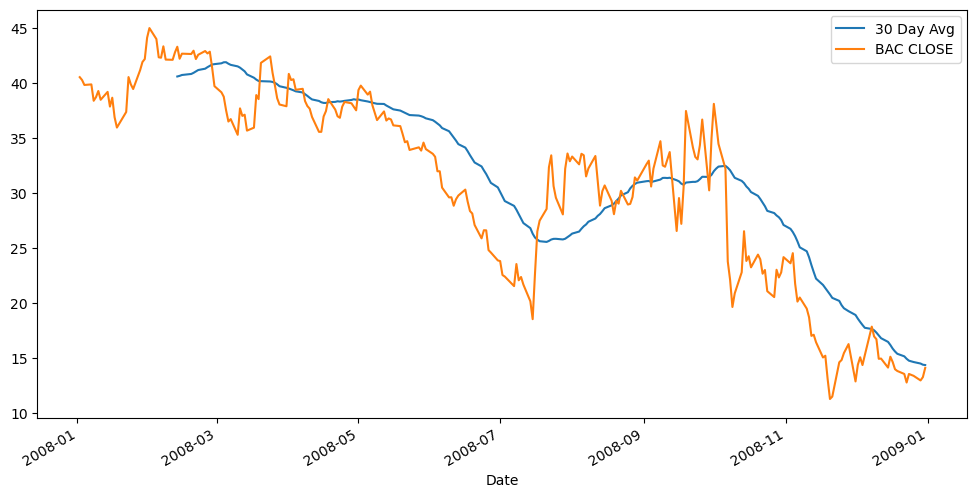

In [113]:
#Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [114]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [115]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [147]:
BAC['Close'].loc['2008-01-01':'2010-01-01'].ta_plot(study='boll')